Submitted By 

Tanya Srivastava 101918031

Ishita Mullick 101918035

# 1. Importing required modules and libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix



# 2. Data Description

In [ ]:
data=pd.read_csv("water_potability.csv")
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
print("No. of rows in dataset = ",data.shape[0])
print("No. of columns in dataset = ",data.shape[1])
print()
print("The type of data in each column is")
data.dtypes

No. of rows in dataset =  3276
No. of columns in dataset =  10

The type of data in each column is


ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

#Data Aggregation
Data aggregation is any process whereby data is gathered and expressed in a summary form. When data is aggregated, atomic data rows -- typically gathered from multiple sources -- are replaced with totals or summary statistics

In [ ]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
set(data.iloc[:,-1])
print("Values of the target class - Binary Classification")

Values of the target class - Binary Classification


# 3. Data Visualisation

### Correlation Matrix and Heatmap 

In [ ]:
Corr0=data.corr()
Corr0

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


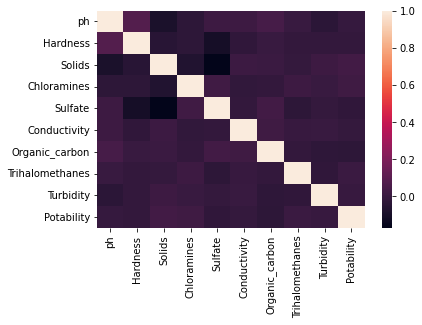

In [ ]:
sb.heatmap(Corr0)

The above heatmap suggests that the features are very less correlated.

### Plots

#### Histogram 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2635dab990>,
      dtype=object)

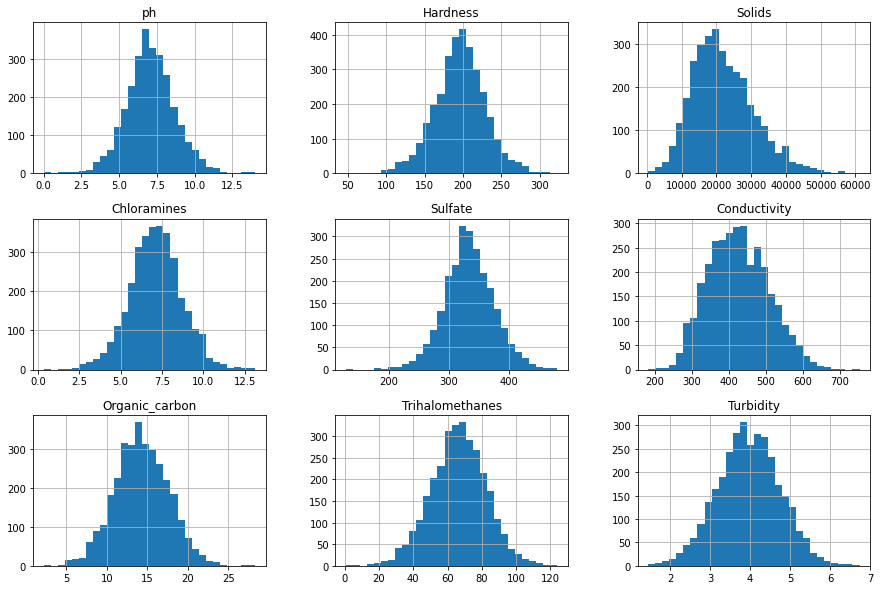

In [ ]:
data.iloc[:,:-1].hist(bins=30, figsize=(15, 10))

#### Density Plots

In [ ]:
data.iloc[:,:-1].plot(kind='density',subplots=True,layout=(4,3),sharex=False,sharey=False,figsize=(15,10))
plt.show()

#### Boxplots

In [ ]:
fig=plt.figure(figsize=(15, 20))
for i in range(9):
    ax=fig.add_subplot(4,3,i+1)
    sb.boxplot(data[data.columns[i]])

#### Stripplot

In [ ]:
# for i in data.columns:
#   sb.stripplot(x=data[i], y=data['Potability'], jitter=0.1)
fig, axes = plt.subplots(3, 3, figsize=(25, 25))
print(sb.stripplot(ax=axes[0, 0],x=data['Potability'], y=data['ph']))
sb.stripplot(ax=axes[0, 1],x=data['Potability'], y=data['Hardness'], jitter=0.1)
sb.stripplot(ax=axes[0, 2],x=data['Potability'], y=data['Solids'], jitter=0.1)
sb.stripplot(ax=axes[1, 0],x=data['Potability'], y=data['Chloramines'], jitter=0.1)
sb.stripplot(ax=axes[1, 1],x=data['Potability'], y=data['Sulfate'], jitter=0.1)
sb.stripplot(ax=axes[1, 2],x=data['Potability'], y=data['Conductivity'], jitter=0.1)
sb.stripplot(ax=axes[2, 0],x=data['Potability'], y=data['Organic_carbon'], jitter=0.1)
sb.stripplot(ax=axes[2, 1],x=data['Potability'], y=data['Trihalomethanes'], jitter=0.1)
sb.stripplot(ax=axes[2, 2],x=data['Potability'], y=data['Turbidity'], jitter=0.1)

# 3. Data Preprocessing
---


## Duplicate data handling

In [ ]:
print("For data :")
print(data.duplicated().value_counts())

This indicates that no duplicate values are present in the dataset

In [ ]:
#To remove the duplicate values, if any
print(data.drop_duplicates(keep = False, inplace = True))
#data.drop_duplicates(subset ="ph",keep = False, inplace = True)

## Handling of missing values

In [ ]:
print("How many null values in each attribute?")
for i in data.columns:
    print(i,": ",data[i].isnull().sum())

### Removing observations with NULL values

In [ ]:
data1 = data.copy()  
data1=data1.dropna() #Dropping null values


In [ ]:
print("How many null values in each attribute after removal?")
for i in data1.columns: 
    print(i,": ",data1[i].isnull().sum())

### Replacing NULL values with mean

In [ ]:
data2 = data.copy() 
for i in data2.columns:
    m=data2[i].mean()
    data2[i].fillna(m, inplace = True)

### Replacing NULL values with median


In [ ]:
data3 = data.copy()
for i in data3.columns:
    m=data3[i].median()
    data3[i].fillna(m, inplace = True)

## Outlier Detection and Handling
We employ the concept of Quartiles to indentify the outliers, we use boxplots to visualize the same. After detection, we handle them by bringing that value in the 25th or 75th percentile depending on its initial value.

In [ ]:
# Data set 1 - removing observations with NULL values
fig=plt.figure(figsize=(15, 20))
for i in range(9):
    ax=fig.add_subplot(4,3,i+1)
    sb.boxplot(data1[data1.columns[i]])
    

In [ ]:
for i in data1.columns:
    q25=data1[i].quantile(0.25)
    q75=data1[i].quantile(0.75)
    iqr=q75-q25
    high=q75+1.5*iqr
    low=q25-1.5*iqr
    for j,k in data1.iterrows():
        if data1[i][j]>high:
            data1.at[j,i]=high
        elif data1[i][j]<low:
            data1.at[j,i]=low


In [ ]:
fig=plt.figure(figsize=(15, 20))
for i in range(9):
    ax=fig.add_subplot(4,3,i+1)
    sb.boxplot(data1[data1.columns[i]])
    

In [ ]:
# Data set 2 - replacing NULL values with mean
fig=plt.figure(figsize=(15, 20))
for i in range(9):
    ax=fig.add_subplot(4,3,i+1)
    sb.boxplot(data2[data2.columns[i]])
    

In [ ]:
for i in data2.columns:
    q25=data2[i].quantile(0.25)
    q75=data2[i].quantile(0.75)
    iqr=q75-q25
    high=q75+1.5*iqr
    low=q25-1.5*iqr
    for j,k in data2.iterrows():
        if data2[i][j]>high:
            data2.at[j,i]=high
        elif data2[i][j]<low:
            data2.at[j,i]=low

In [ ]:
# fig=plt.figure(figsize=(15, 20))
# for i in range(9):
#     ax=fig.add_subplot(4,3,i+1)
#     sb.boxplot(data2[data2.columns[i]])
    

In [ ]:
# Data set 3 - replacing NULL values with median 
fig=plt.figure(figsize=(15, 20))
for i in range(9):
    ax=fig.add_subplot(4,3,i+1)
    sb.boxplot(data3[data3.columns[i]])
    

In [ ]:
for i in data3.columns:
    q25=data3[i].quantile(0.25)
    q75=data3[i].quantile(0.75)
    iqr=q75-q25
    high=q75+1.5*iqr
    low=q25-1.5*iqr
    for j,k in data3.iterrows():
        if data3[i][j]>high:
            data3.at[j,i]=high
        elif data3[i][j]<low:
            data3.at[j,i]=low

In [ ]:
# fig=plt.figure(figsize=(15, 20))
# for i in range(9):
#     ax=fig.add_subplot(4,3,i+1)
#     sb.boxplot(data3[data3.columns[i]])

## Normalisation 

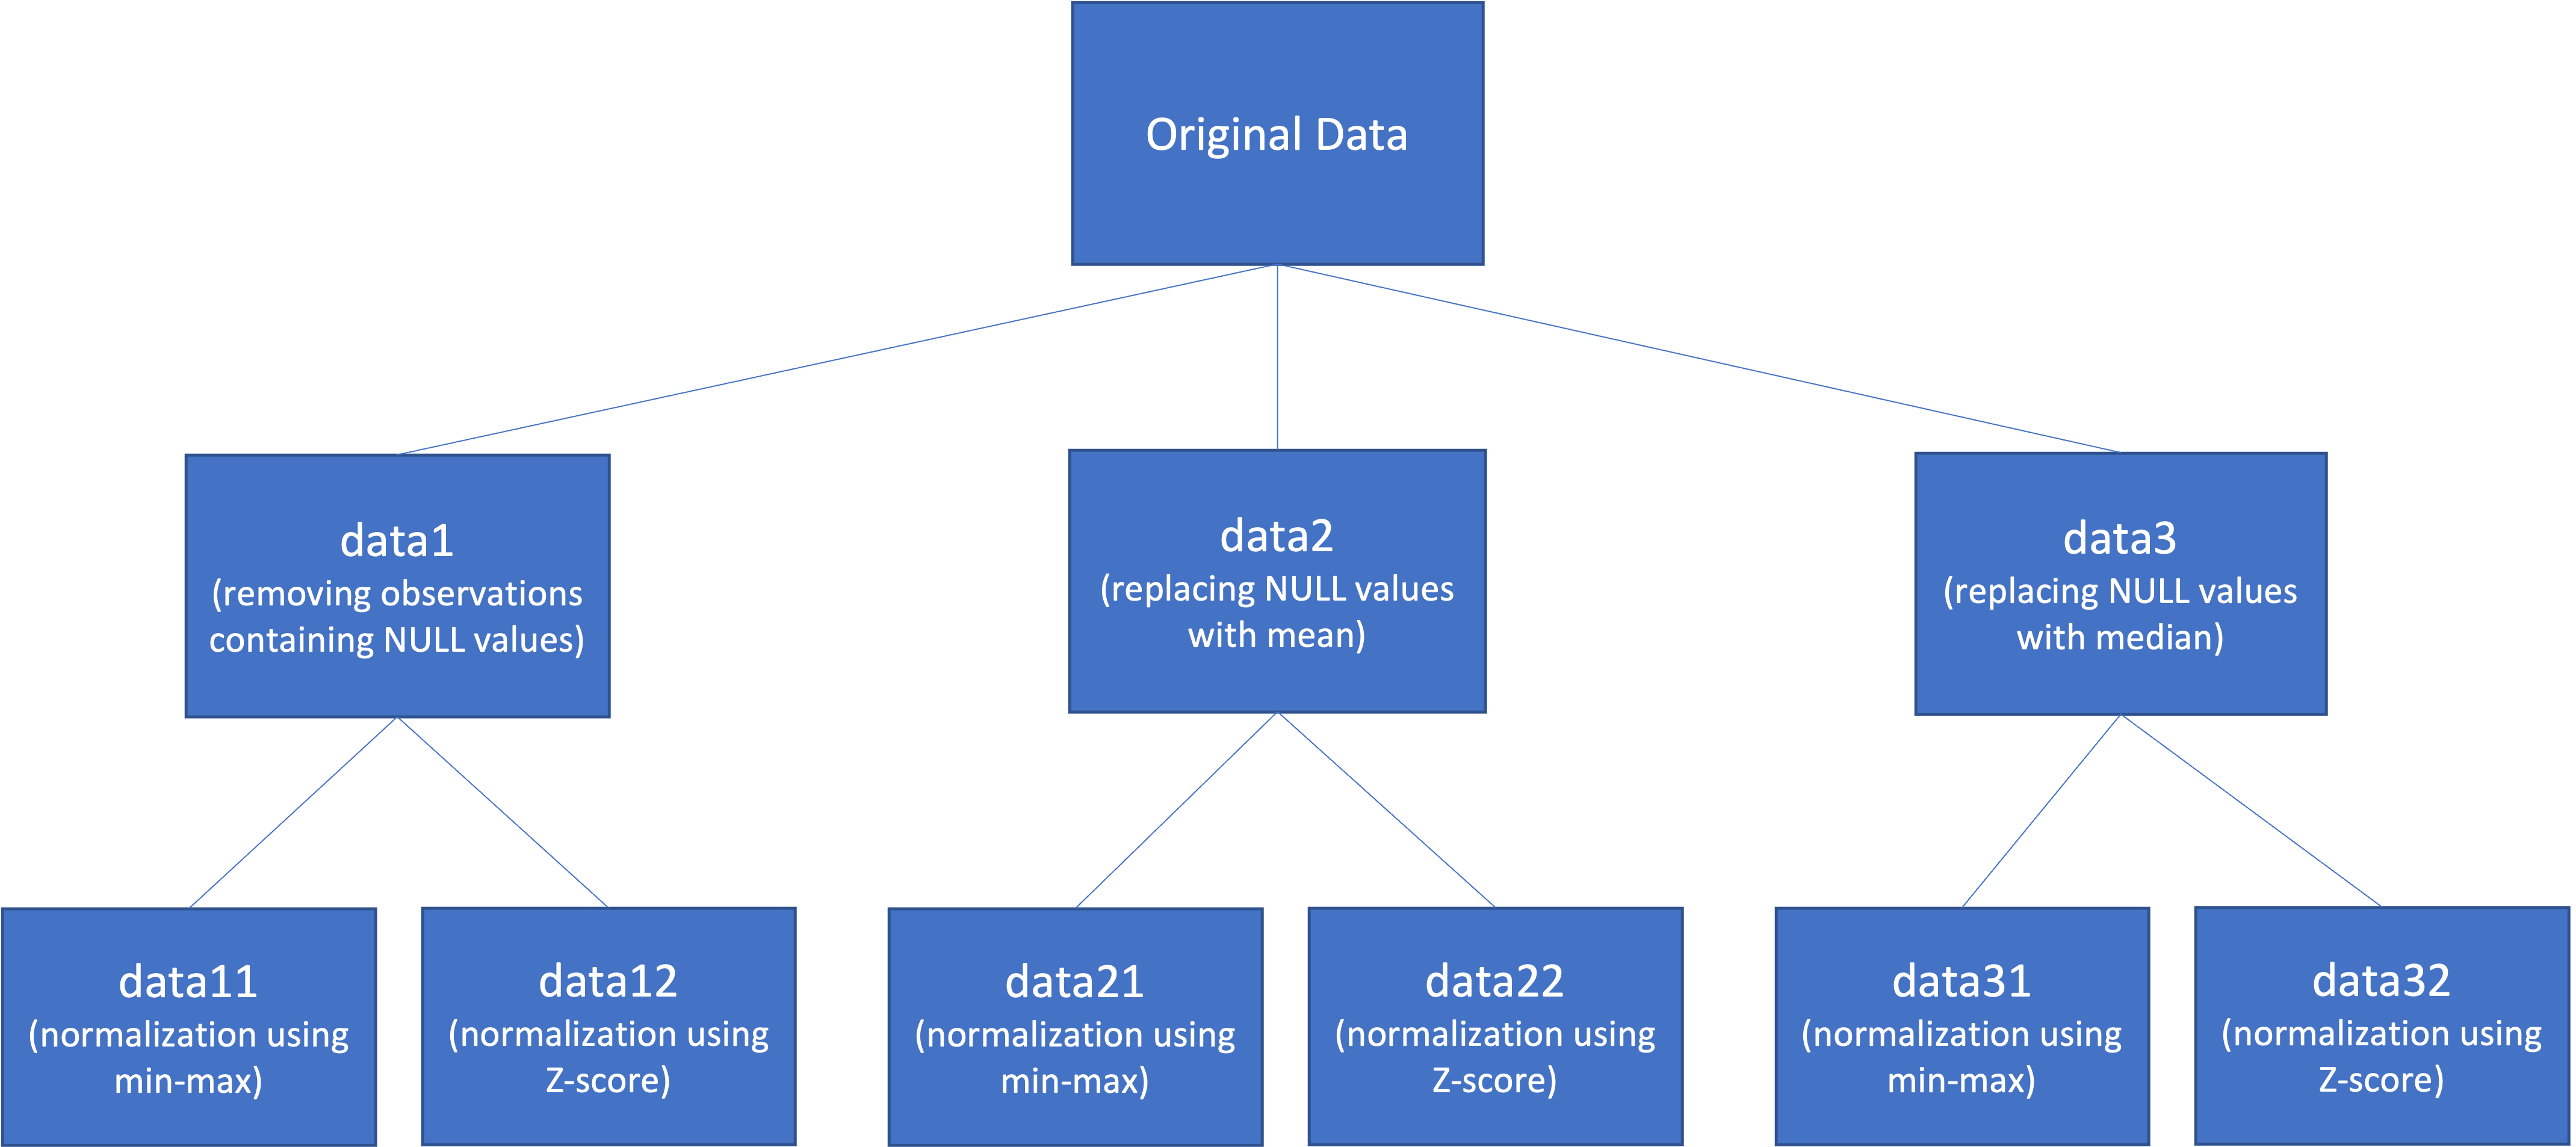

#### Using Min-Max method

In [ ]:
data11=data1.copy()
for i in data11.columns[:-1]:
    minn=data[i].min()
    maxx=data[i].max()
    diff=maxx-minn
    data11[i] = (data11[i] - minn) / diff

In [ ]:
print(data11)

In [ ]:
data21=data2.copy()
for i in data21.columns[:-1]:
    minn=data21[i].min()
    maxx=data21[i].max()
    diff=maxx-minn
    data21[i] = (data21[i] - minn) / diff

In [ ]:
data31=data3.copy()
for i in data31.columns[:-1]:
    minn=data31[i].min()
    maxx=data31[i].max()
    diff=maxx-minn
    data31[i] = (data31[i] - minn) / diff

#### using Z score

In [ ]:
data12 = data1.copy()
for i in data12.columns[:-1]:
    m=data12[i].mean()
    sd=data12[i].std()
    data12[i] = (data12[i] - m) / data12[i].std()


In [ ]:
print(data12)

In [ ]:
data22 = data2.copy()
for i in data22.columns[:-1]:
    m=data22[i].mean()
    sd=data22[i].std()
    data22[i] = (data22[i] - m) / data22[i].std()


In [ ]:
data32 = data3.copy()
for i in data32.columns[:-1]:
    m=data32[i].mean()
    sd=data32[i].std()
    data32[i] = (data32[i] - m) / data32[i].std()


## Data Sampling


In [ ]:
sam=data.sample(100)
sam

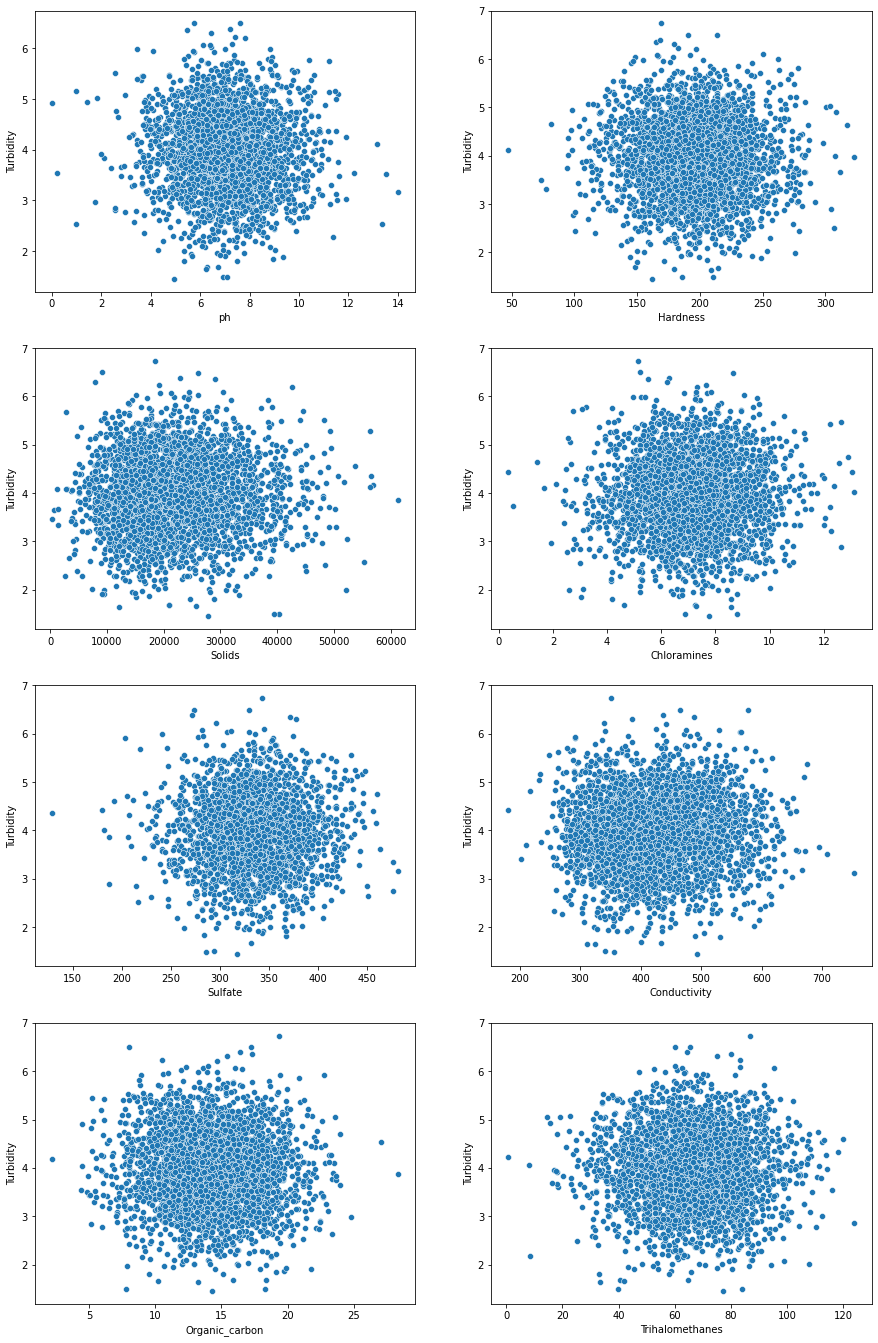

In [ ]:
fig=plt.figure(figsize=(15, 30))
count=1
for i in range(data.shape[1]-2):
    ax=fig.add_subplot(5,2,count)
    count=count+1
    sb.scatterplot(data.iloc[:,i],data.loc[:,"Turbidity"])



Through this, we are trying to understand how the various chemical components of water such as Sulphates and Trihalomethanes affect the Turbidity (a physical characteristic) of water in the selected sample.

## Discretization
As we are using Decision trees and all our features are of continuous type, we would want to discretize our features. To decide the number of bins for each feature, we see which ones have a larger standard deviation. This is a good measure to see how dispersed the data is. The more the data is dispersed, more the number of bins would be ideal. 
For our case, upper half of all standard deviations get 10 bins, and the lower ones get 7 bins.

#### Using K bins discretizer

In [ ]:
x=data11.iloc[:,:-1].describe()
print(x)
print()
print ("Mean of all standard deviations=",(x.loc['std']).mean())
print()
for i in range(x.shape[1]):
  if x.loc['std',x.columns[i]]>(x.loc['std']).mean():
    print(x.columns[i]," will have 10 bins")
    kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
    data11.iloc[:,i] = kbins.fit_transform(np.array(data11.iloc[:,i]).reshape(-1,1))
  else:
    print(x.columns[i]," will have 7 bins")
    kbins = KBinsDiscretizer(n_bins=7, encode='ordinal', strategy='uniform')
    data11.iloc[:,i] = kbins.fit_transform(np.array(data11.iloc[:,i]).reshape(-1,1))


                ph     Hardness  ...  Trihalomethanes    Turbidity
count  2011.000000  2011.000000  ...      2011.000000  2011.000000
mean      0.506213     0.539093  ...         0.532760     0.476382
std       0.109550     0.115706  ...         0.128994     0.146766
min       0.224633     0.253068  ...         0.188264     0.072986
25%       0.434980     0.469049  ...         0.447946     0.376804
50%       0.501950     0.543214  ...         0.533856     0.476116
75%       0.575212     0.613036  ...         0.621067     0.579349
max       0.785560     0.829017  ...         0.880748     0.883166

[8 rows x 9 columns]

Mean of all standard deviations= 0.12694919380148467

ph  will have 7 bins
Hardness  will have 7 bins
Solids  will have 10 bins
Chloramines  will have 7 bins
Sulfate  will have 7 bins
Conductivity  will have 10 bins
Organic_carbon  will have 7 bins
Trihalomethanes  will have 10 bins
Turbidity  will have 10 bins


In [ ]:
data11

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,4.0,4.0,4.0,4.0,4.0,3.0,5.0,8.0,6.0,0
4,5.0,2.0,3.0,2.0,2.0,4.0,2.0,0.0,5.0,0
5,2.0,3.0,6.0,3.0,3.0,1.0,1.0,3.0,1.0,0
6,6.0,5.0,6.0,3.0,5.0,1.0,3.0,7.0,1.0,0
7,4.0,3.0,3.0,1.0,2.0,6.0,2.0,4.0,5.0,0
...,...,...,...,...,...,...,...,...,...,...
3267,5.0,4.0,3.0,2.0,2.0,4.0,1.0,3.0,6.0,1
3268,3.0,3.0,3.0,4.0,2.0,2.0,4.0,0.0,3.0,1
3269,6.0,0.0,8.0,5.0,0.0,5.0,4.0,2.0,5.0,1
3270,2.0,3.0,5.0,4.0,3.0,4.0,2.0,4.0,4.0,1


In [ ]:
x=data12.iloc[:,:-1].describe()
print(x)
print()
print ("Mean of all standard deviations=",(x.loc['std']).mean())
print()
for i in range(x.shape[1]):
  if x.loc['std',x.columns[i]]>(x.loc['std']).mean():
    print(x.columns[i]," will have 10 bins")
    kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
    data12.iloc[:,i] = kbins.fit_transform(np.array(data12.iloc[:,i]).reshape(-1,1))
  else:
    print(x.columns[i]," will have 7 bins")
    kbins = KBinsDiscretizer(n_bins=7, encode='ordinal', strategy='uniform')
    data12.iloc[:,i] = kbins.fit_transform(np.array(data12.iloc[:,i]).reshape(-1,1))


                 ph      Hardness  ...  Trihalomethanes     Turbidity
count  2.011000e+03  2.011000e+03  ...     2.011000e+03  2.011000e+03
mean   4.866432e-15 -1.139967e-14  ...     8.478752e-16 -4.599503e-15
std    1.000000e+00  1.000000e+00  ...     1.000000e+00  1.000000e+00
min   -2.570340e+00 -2.471995e+00  ...    -2.670648e+00 -2.748559e+00
25%   -6.502310e-01 -6.053672e-01  ...    -6.575122e-01 -6.784797e-01
50%   -3.891539e-02  3.561487e-02  ...     8.495524e-03 -1.810199e-03
75%    6.298421e-01  6.390516e-01  ...     6.845783e-01  7.015733e-01
max    2.549952e+00  2.505680e+00  ...     2.697714e+00  2.771653e+00

[8 rows x 9 columns]

Mean of all standard deviations= 0.9999999999999998

ph  will have 7 bins
Hardness  will have 10 bins
Solids  will have 10 bins
Chloramines  will have 10 bins
Sulfate  will have 10 bins
Conductivity  will have 7 bins
Organic_carbon  will have 7 bins
Trihalomethanes  will have 7 bins
Turbidity  will have 7 bins


In [ ]:
x=data21.iloc[:,:-1].describe()
print(x)
print()
print ("Mean of all standard deviations=",(x.loc['std']).mean())
print()
for i in range(x.shape[1]):
  if x.loc['std',x.columns[i]]>(x.loc['std']).mean():
    print(x.columns[i]," will have 10 bins")
    kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
    data21.iloc[:,i] = kbins.fit_transform(np.array(data21.iloc[:,i]).reshape(-1,1))
  else:
    print(x.columns[i]," will have 7 bins")
    kbins = KBinsDiscretizer(n_bins=7, encode='ordinal', strategy='uniform')
    data21.iloc[:,i] = kbins.fit_transform(np.array(data21.iloc[:,i]).reshape(-1,1))


                ph     Hardness  ...  Trihalomethanes    Turbidity
count  3276.000000  3276.000000  ...      3276.000000  3276.000000
mean      0.500956     0.497698  ...         0.497044     0.499198
std       0.216964     0.201028  ...         0.193406     0.183010
min       0.000000     0.000000  ...         0.000000     0.000000
25%       0.375000     0.375000  ...         0.375000     0.375000
50%       0.501089     0.501310  ...         0.496743     0.496467
75%       0.625000     0.625000  ...         0.625000     0.625000
max       1.000000     1.000000  ...         1.000000     1.000000

[8 rows x 9 columns]

Mean of all standard deviations= 0.19742372794134277

ph  will have 10 bins
Hardness  will have 10 bins
Solids  will have 7 bins
Chloramines  will have 7 bins
Sulfate  will have 10 bins
Conductivity  will have 7 bins
Organic_carbon  will have 7 bins
Trihalomethanes  will have 7 bins
Turbidity  will have 7 bins


In [ ]:
x=data22.iloc[:,:-1].describe()
print(x)
print()
print ("Mean of all standard deviations=",(x.loc['std']).mean())
print()
for i in range(x.shape[1]):
  if x.loc['std',x.columns[i]]>(x.loc['std']).mean():
    print(x.columns[i]," will have 10 bins")
    kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
    data22.iloc[:,i] = kbins.fit_transform(np.array(data22.iloc[:,i]).reshape(-1,1))
  else:
    print(x.columns[i]," will have 7 bins")
    kbins = KBinsDiscretizer(n_bins=7, encode='ordinal', strategy='uniform')
    data22.iloc[:,i] = kbins.fit_transform(np.array(data22.iloc[:,i]).reshape(-1,1))


                 ph      Hardness  ...  Trihalomethanes     Turbidity
count  3.276000e+03  3.276000e+03  ...     3.276000e+03  3.276000e+03
mean   5.030822e-14 -4.568967e-15  ...     1.711153e-15 -6.535269e-16
std    1.000000e+00  1.000000e+00  ...     1.000000e+00  1.000000e+00
min   -2.308940e+00 -2.475772e+00  ...    -2.569951e+00 -2.727706e+00
25%   -5.805388e-01 -6.103560e-01  ...    -6.310247e-01 -6.786391e-01
50%    6.120291e-04  1.796547e-02  ...    -1.558329e-03 -1.492066e-02
75%    5.717287e-01  6.332546e-01  ...     6.615927e-01  6.874057e-01
max    2.300130e+00  2.498671e+00  ...     2.600519e+00  2.736473e+00

[8 rows x 9 columns]

Mean of all standard deviations= 1.0000000000000009

ph  will have 10 bins
Hardness  will have 7 bins
Solids  will have 7 bins
Chloramines  will have 7 bins
Sulfate  will have 10 bins
Conductivity  will have 7 bins
Organic_carbon  will have 7 bins
Trihalomethanes  will have 7 bins
Turbidity  will have 7 bins


In [ ]:
x=data31.iloc[:,:-1].describe()
print(x)
print()
print ("Mean of all standard deviations=",(x.loc['std']).mean())
print()
for i in range(x.shape[1]):
  if x.loc['std',x.columns[i]]>(x.loc['std']).mean():
    print(x.columns[i]," will have 10 bins")
    kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
    data31.iloc[:,i] = kbins.fit_transform(np.array(data31.iloc[:,i]).reshape(-1,1))
  else:
    print(x.columns[i]," will have 7 bins")
    kbins = KBinsDiscretizer(n_bins=7, encode='ordinal', strategy='uniform')
    data31.iloc[:,i] = kbins.fit_transform(np.array(data31.iloc[:,i]).reshape(-1,1))


                ph     Hardness  ...  Trihalomethanes    Turbidity
count  3276.000000  3276.000000  ...      3276.000000  3276.000000
mean      0.499919     0.497698  ...         0.497184     0.499198
std       0.216977     0.201028  ...         0.193407     0.183010
min       0.000000     0.000000  ...         0.000000     0.000000
25%       0.375000     0.375000  ...         0.375000     0.375000
50%       0.494174     0.501310  ...         0.499567     0.496467
75%       0.625000     0.625000  ...         0.625000     0.625000
max       1.000000     1.000000  ...         1.000000     1.000000

[8 rows x 9 columns]

Mean of all standard deviations= 0.1974265342246124

ph  will have 10 bins
Hardness  will have 10 bins
Solids  will have 7 bins
Chloramines  will have 7 bins
Sulfate  will have 10 bins
Conductivity  will have 7 bins
Organic_carbon  will have 7 bins
Trihalomethanes  will have 7 bins
Turbidity  will have 7 bins


In [ ]:
x=data32.iloc[:,:-1].describe()
print(x)
print()
print ("Mean of all standard deviations=",(x.loc['std']).mean())
print()
for i in range(x.shape[1]):
  if x.loc['std',x.columns[i]]>(x.loc['std']).mean():
    print(x.columns[i]," will have 10 bins")
    kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
    data32.iloc[:,i] = kbins.fit_transform(np.array(data32.iloc[:,i]).reshape(-1,1))
  else:
    print(x.columns[i]," will have 7 bins")
    kbins = KBinsDiscretizer(n_bins=7, encode='ordinal', strategy='uniform')
    data32.iloc[:,i] = kbins.fit_transform(np.array(data32.iloc[:,i]).reshape(-1,1))


                 ph      Hardness  ...  Trihalomethanes     Turbidity
count  3.276000e+03  3.276000e+03  ...     3.276000e+03  3.276000e+03
mean  -2.535528e-14 -4.568967e-15  ...     9.542496e-15 -6.535269e-16
std    1.000000e+00  1.000000e+00  ...     1.000000e+00  1.000000e+00
min   -2.304021e+00 -2.475772e+00  ...    -2.570663e+00 -2.727706e+00
25%   -5.757266e-01 -6.103560e-01  ...    -6.317445e-01 -6.786391e-01
50%   -2.647950e-02  1.796547e-02  ...     1.232454e-02 -1.492066e-02
75%    5.764697e-01  6.332546e-01  ...     6.608679e-01  6.874057e-01
max    2.304764e+00  2.498671e+00  ...     2.599786e+00  2.736473e+00

[8 rows x 9 columns]

Mean of all standard deviations= 1.0

ph  will have 10 bins
Hardness  will have 7 bins
Solids  will have 7 bins
Chloramines  will have 7 bins
Sulfate  will have 7 bins
Conductivity  will have 10 bins
Organic_carbon  will have 10 bins
Trihalomethanes  will have 7 bins
Turbidity  will have 7 bins


In [ ]:
# print(data11['Turbidity'].describe().loc['mean'])
# (data11['Turbidity']).range
print(min(data11['Turbidity'])," - ",max(data11['Turbidity']))
print(data11['Turbidity'].describe().loc['mean'])
n=len(data['Turbidity'])
print(n)
# Q1=()
# Q3=
# for i in range(data['Turbidity']):


0.0  -  9.0
4.470412729985082
3276


## Feature Selection

In [ ]:
# Create and fit selector
selector = SelectKBest(k=7)
selector.fit(data11.iloc[:,:-1],data11.iloc[:,-1])
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
temp=data11.iloc[:,-1]
data11 = data11.iloc[:,:-1].iloc[:,cols]
data11['Potability']=temp


# Create and fit selector
selector = SelectKBest(k=7)
selector.fit(data12.iloc[:,:-1],data12.iloc[:,-1])
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
temp=data12.iloc[:,-1]
data12 = data12.iloc[:,:-1].iloc[:,cols]
data12['Potability']=temp


# Create and fit selector
selector = SelectKBest(k=7)
selector.fit(data21.iloc[:,:-1],data21.iloc[:,-1])
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
temp=data21.iloc[:,-1]
data21 = data21.iloc[:,:-1].iloc[:,cols]
data21['Potability']=temp

# Create and fit selector
selector = SelectKBest(k=7)
selector.fit(data22.iloc[:,:-1],data22.iloc[:,-1])
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
temp=data22.iloc[:,-1]
data22 = data22.iloc[:,:-1].iloc[:,cols]
data22['Potability']=temp

# Create and fit selector
selector = SelectKBest(k=7)
selector.fit(data31.iloc[:,:-1],data31.iloc[:,-1])
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
temp=data31.iloc[:,-1]
data31 = data31.iloc[:,:-1].iloc[:,cols]
data31['Potability']=temp

# Create and fit selector
selector = SelectKBest(k=7)
selector.fit(data32.iloc[:,:-1],data32.iloc[:,-1])
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
temp=data32.iloc[:,-1]
data32 = data32.iloc[:,:-1].iloc[:,cols]
data32['Potability']=temp

In [ ]:
data11

,ph,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Turbidity,Potability
3,4.0,4.0,4.0,4.0,3.0,5.0,6.0,0
4,5.0,3.0,2.0,2.0,4.0,2.0,5.0,0
5,2.0,6.0,3.0,3.0,1.0,1.0,1.0,0
6,6.0,6.0,3.0,5.0,1.0,3.0,1.0,0
7,4.0,3.0,1.0,2.0,6.0,2.0,5.0,0
...,...,...,...,...,...,...,...,...
3267,5.0,3.0,2.0,2.0,4.0,1.0,6.0,1
3268,3.0,3.0,4.0,2.0,2.0,4.0,3.0,1
3269,6.0,8.0,5.0,0.0,5.0,4.0,5.0,1
3270,2.0,5.0,4.0,3.0,4.0,2.0,4.0,1


## Feature - Extraction - PCA
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [ ]:
alldf=['data11','data12','data21','data22','data31','data32']

for i in alldf:
  pca = PCA(n_components=5)
  temp=locals()[i].iloc[:,-1]
  temp=pd.DataFrame(temp)
  temp.reset_index(inplace=True)
  principalComponents=pca.fit_transform(locals()[i].iloc[:,:-1])
  locals()[i]=pd.DataFrame(data=principalComponents,columns=['PC1','PC2','PC3','PC4','PC5'])
  locals()[i]['Potability']=temp.iloc[:,1]

# Decision Tree
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html 

In [ ]:
alldf=['data11','data12','data21','data22','data31','data32']
AS=[]
F1=[]
RS=[]
PS=[]
CM=[]
for i in alldf:
  DT=DecisionTreeClassifier(criterion='gini',splitter="best",min_samples_split=2,min_samples_leaf=1,max_depth=7,random_state=9)
  features=locals()[i].iloc[:,:-1]
  target=locals()[i].iloc[:,-1]
  xtrain,xtest,ytrain,ytest=train_test_split(features, target,random_state=88)
  DT.fit(xtrain,ytrain)
  ypred=DT.predict(xtest)
  AS.append(accuracy_score(ytest,ypred))
  F1.append(f1_score(ytest,ypred))
  RS.append(recall_score(ytest, ypred))
  PS.append(precision_score(ytest, ypred))
  CM.append(confusion_matrix(ytest, ypred))

res={'Accuracy Score':AS,'F1 score':F1,'Recall Score':RS,'Precision Score':PS,'Confusion Matrix':CM}
res=pd.DataFrame(res)
# avg=res.mean()
res.index=['Remove/ min-max','Remove/ Z-score','Mean replace/ min-max','Mean replace/ Z-score','Median replace/ min-max','Median replace/ Z-score']
res


,Accuracy Score,F1 score,Recall Score,Precision Score,Confusion Matrix
Remove/ min-max,0.612326,0.285714,0.197970,0.513158,"[[269, 37], [158, 39]]"
Remove/ Z-score,0.630219,0.392157,0.304569,0.550459,"[[257, 49], [137, 60]]"
Mean replace/ min-max,0.638584,0.237113,0.149837,0.567901,"[[477, 35], [261, 46]]"
Mean replace/ Z-score,0.627595,0.314607,0.228013,0.507246,"[[444, 68], [237, 70]]"
Median replace/ min-max,0.630037,0.251852,0.166124,0.520408,"[[465, 47], [256, 51]]"
Median replace/ Z-score,0.627595,0.289044,0.201954,0.508197,"[[452, 60], [245, 62]]"


In [ ]:
print('Average accuracy is: ',mean(res['Accuracy Score']))

Average accuracy is:  0.6277257092366436
